<a href="https://colab.research.google.com/github/embee430/Data-Projects/blob/main/Exploratory_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install ipython-sql
!pip install sqlalchemy==1.4.35 # database toolkit for python 
!pip install ibm_db_sa # The IBM_DB_SA adapter provides the Python/SQLAlchemy interface to IBM Data Servers.

     |████████████████████████████████| 1.1 MB 6.7 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
  Created wheel for ibm-db-sa: filename=ibm_db_sa-0.3.7-py3-none-any.whl size=29316 sha256=d980f2459aeb89c6335317c0b97c099bbb7f535b67df6b04fdfc4519e7d84f43
  Stored in directory: /root/.cache/pip/wheels/4a/e9/e7/0ee334a6cb2f09ec45978e05837b66f59494b482ef38c7ae33
  Created wheel for ibm-db: filename=ibm_db-3.1.1-cp37-cp37m-linux_x86_64.whl size=41420483 sha256=dd8335d0dcaf3f458c1c6f53549542db824387dfb3c3c4173cdafa9d409fce21
  Stored in directory: /root/.cache/pip/wheels/03/a2/bf/27e4a4c9ca57eeea66526c74386df7dfd118d689ab794f1ab6
Successfully built ibm-db-sa ibm-db


In [1]:
%load_ext sql

In [4]:
!pip install sqlalchemy==1.3.9

     |████████████████████████████████| 6.0 MB 4.3 MB/s 
  Created wheel for sqlalchemy: filename=SQLAlchemy-1.3.9-cp37-cp37m-linux_x86_64.whl size=1203567 sha256=381f5341621a4316eac5fd2f4c559eada2348216518c9fc5c87952ee64606710
  Stored in directory: /root/.cache/pip/wheels/03/71/13/010faf12246f72dc76b4150e6e599d13a85b4435e06fb9e51f
Successfully built sqlalchemy
  Attempting uninstall: sqlalchemy
    Found existing installation: SQLAlchemy 1.4.35
    Uninstalling SQLAlchemy-1.4.35:
      Successfully uninstalled SQLAlchemy-1.4.35


In [2]:
%sql ibm_db_sa://tgb63017:ldTsBJtMZX5Nbp3N@824dfd4d-99de-440d-9991-629c01b3832d.bs2io90l08kqb1od8lcg.databases.appdomain.cloud:30119/BLUDB?security=SSL

'Connected: tgb63017@BLUDB'

In [7]:
import pandas
ChicagoData = pandas.read_csv('https://data.cityofchicago.org/resource/jcxq-k9xf.csv')

In [8]:
%sql PERSIST ChicagoData

 * ibm_db_sa://tgb63017:***@824dfd4d-99de-440d-9991-629c01b3832d.bs2io90l08kqb1od8lcg.databases.appdomain.cloud:30119/BLUDB


'Persisted chicagodata'

In [10]:
%sql select count(*) from ChicagoData

 * ibm_db_sa://tgb63017:***@824dfd4d-99de-440d-9991-629c01b3832d.bs2io90l08kqb1od8lcg.databases.appdomain.cloud:30119/BLUDB
Done.


1
78


In [11]:
ChicagoData.head(5)

,ca,community_area_name,percent_of_housing_crowded,percent_households_below_poverty,percent_aged_16_unemployed,percent_aged_25_without_high_school_diploma,percent_aged_under_18_or_over_64,per_capita_income_,hardship_index
0,1.0,Rogers Park,7.7,23.6,8.7,18.2,27.5,23939,39.0
1,2.0,West Ridge,7.8,17.2,8.8,20.8,38.5,23040,46.0
2,3.0,Uptown,3.8,24.0,8.9,11.8,22.2,35787,20.0
3,4.0,Lincoln Square,3.4,10.9,8.2,13.4,25.5,37524,17.0
4,5.0,North Center,0.3,7.5,5.2,4.5,26.2,57123,6.0


In [13]:
%sql select count(*) from ChicagoData where hardship_index>50

 * ibm_db_sa://tgb63017:***@824dfd4d-99de-440d-9991-629c01b3832d.bs2io90l08kqb1od8lcg.databases.appdomain.cloud:30119/BLUDB
Done.


1
38


In [14]:
%sql select max(hardship_index) from ChicagoData

 * ibm_db_sa://tgb63017:***@824dfd4d-99de-440d-9991-629c01b3832d.bs2io90l08kqb1od8lcg.databases.appdomain.cloud:30119/BLUDB
Done.


1
98.0


In [19]:
%sql select community_area_name from ChicagoData where hardship_index=98

 * ibm_db_sa://tgb63017:***@824dfd4d-99de-440d-9991-629c01b3832d.bs2io90l08kqb1od8lcg.databases.appdomain.cloud:30119/BLUDB
Done.


community_area_name
Riverdale


In [20]:
%sql select community_area_name from ChicagoData where per_capita_income_>60000

 * ibm_db_sa://tgb63017:***@824dfd4d-99de-440d-9991-629c01b3832d.bs2io90l08kqb1od8lcg.databases.appdomain.cloud:30119/BLUDB
Done.


community_area_name
Lake View
Lincoln Park
Near North Side
Loop


In [21]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

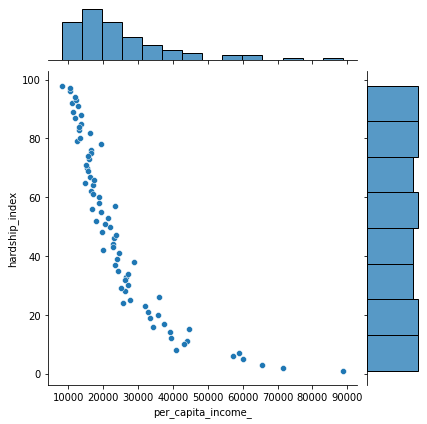

In [22]:
plot = sns.jointplot(x='per_capita_income_',y='hardship_index', data=ChicagoData)

In [ ]:
#We can see that the per capita income and hardship index is negatively correlated based on the data.